In [32]:
# import library
import numpy as np
import pandas as pd
import pylab as pl #untuk plotting
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [36]:
# load data
data = pd.read_csv('data/cakar-ihbs.csv')
data.head(9)

,nama,alamat,kota,nomor_telepon,email,universitas/sekolah_asal,jurusan,IPK,riwayat_pekerjaan,pengalaman,posisi_yang_dilamar,nilai_psikotest,media_sosial,jumlah_unggahan,tingkat_interaksi,jumlah_pengikut,jenis_konten,rekomendasi
0,Nuro Azlina Puadi,Jl. Koperasi No. 79 Aikmel,Lombok Timur NTB,6285640419208,azlinafuadi571@gmail.com,Bina Madani Putri Magelang,IPA,3.43,Bina Madani Putri Magelang,1,Musyrifah,82,Instagram,16,15,100,Positif,Diterima
1,Shabrina Ainimeiko,Jl. Jawa II Blok N5/6 Reni Jaya,Kec. Pamulang,6285710711806,sainimeiko@gmail.com,LIPIA Jakarta,Bahasa Arab,4.60,Al Buruj Learning Center,1,Guru Bahasa Arab,80,Twitter,19,23,90,Positif,Diterima
2,Fauzi Anis Nazhip,Jl. Jend A Yani Lr. 15,Makassar,6282350645243,Fauzianis24@gmail.com,LIPIA Jakarta,Bahasa Arab,4.80,SD Al-Fallah kalibata,3,Guru Bahasa Arab,60,Facebook,18,25,74,Positif,Diterima
3,Nadia Chairunnisa,Jl. Pepaya IV No.18A Cengkareng Barat,Jakarta Barat,6285761063974,nchairunnisa7@gmail.com,Universitas Negeri Jakarta,Pendidikan Sosiologi,3.64,SMA 25 Jakarta,3,Guru Sosiologi,65,Twitter,10,12,80,Negatif,Ditolak
4,Afian,Jalan Musa Karim Salu Karema,Majene,6285340618670,alfianalbungsu@gmail.com,STIKES Marendeng Majene,Perawat,3.92,Klinik Badr Alkhaleej Medical Center,1,Petugas UKS,75,Facebook,20,15,100,Positif,Diterima
5,Ahmad Wildan,Jl. Lebak bulus dalam No. 11,Jakarta Selatan,628551875559,wildanahmaf19@gmail.com,Institut PTIQ Jakarta,Manajemen Pendidikan,3.51,SMP Al Madinah,3,Musyrif,80,Instagram,24,20,95,Positif,Diterima
6,Habibi,Jl. Sultan Agung Tirtayasa Kp.Sipon RT/RW 04 0...,Serang Banten,6285779867203,habiebee.it@gmail.com,Islamic Center Wadi Mubarak,Ilmu Al-Quran Dan Tafsir,2.64,SMP Ponpes Riyadusshalihin,2,Musyrif,80,Twitter,20,10,100,Negatif,Ditolak
7,Ayu siti fatimah,Perumahan Graha Arradea Dramaga,Bogor,62895378578282,fatimah13.ayusiti@gmail.com,Universitas Ibn Kaldun,Ekonomi Syariah,3.69,SMP Pondok Media Islamic Boarding School,1,Guru Umum SD,67,Facebook,15,20,95,Negatif,Ditolak
8,Muhammad Rendy Arifiyanto,Kp.Pasir hayam Rt.03/01 Desa Sirnagalih Kec.C...,Bandung,6281218552477,asrirendi76@gmail.com,Universitas Terbuka,Ilmu Perpustakaan,2.00,Sekolah Dasar Negeri Merdeka Bandung,3,Pustakawan,85,Twitter,10,50,90,Negatif,Ditolak


In [37]:
cdata = data[['IPK','nilai_psikotest','jumlah_unggahan','jumlah_pengikut']]
cdata.head(9)

,IPK,nilai_psikotest,jumlah_unggahan,jumlah_pengikut
0,3.43,82,16,100
1,4.60,80,19,90
2,4.80,60,18,74
3,3.64,65,10,80
4,3.92,75,20,100
5,3.51,80,24,95
6,2.64,80,20,100
7,3.69,67,15,95
8,2.00,85,10,90


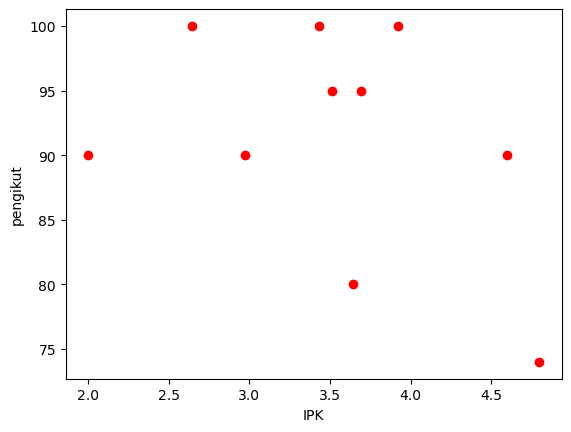

In [38]:
#Kita plot hubungannya

plt.scatter(cdata.IPK, cdata.jumlah_pengikut,  color='red')
plt.xlabel("IPK")
plt.ylabel("pengikut")
plt.show()

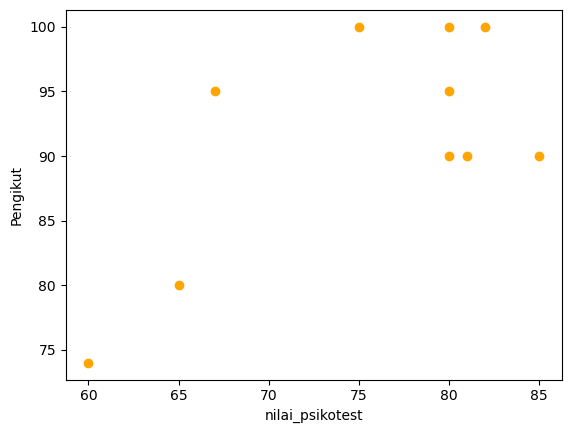

In [39]:
#Kita plot hubungannya

plt.scatter(cdata.nilai_psikotest, cdata.jumlah_pengikut,  color='orange')
plt.xlabel("nilai_psikotest")
plt.ylabel("Pengikut")
plt.show()

In [40]:
#Membagi data

msk = np.random.rand(len(data)) < 0.8
train = cdata[msk]
test = cdata[~msk]

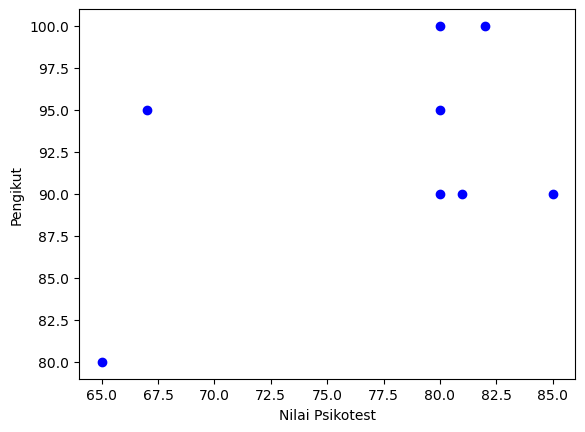

In [41]:
plt.scatter(train.nilai_psikotest, train.jumlah_pengikut,  color='blue')
plt.xlabel("Nilai Psikotest")
plt.ylabel("Pengikut")
plt.show()

In [42]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['nilai_psikotest']])
train_y = np.asanyarray(train[['jumlah_pengikut']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.4144385]]
Intercept:  [60.38101604]


Text(0, 0.5, 'Pengikut')

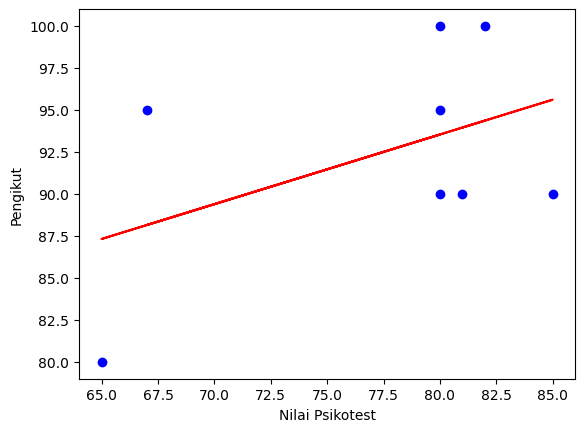

In [43]:
#Plot hasil regresi

plt.scatter(train.nilai_psikotest, train.jumlah_pengikut,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Nilai Psikotest")
plt.ylabel("Pengikut")

In [1]:
#Menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['nilai_psikotest']])
test_y = np.asanyarray(test[['jumlah_pengikut']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ModuleNotFoundError: No module named 'sklearn'